# Symbolic Metamodeling of Univariate Functions using Meijer $G$-functions

In this notebook, we carry out the first experiment (Section 5.1) in our paper *"Demystifying Black-box Models with Symbolic Metamodels"* submitted to **NeurIPS 2019** by *Ahmed M. Alaa and Mihaela van der Schaar*. In this experiment, we demonstrate the first use case of symbolic metamodeling using synthetic data, where we show how can we learn symbolic expressions for unobserved black-box functions for which we have only query access.

## Can we learn complex symbolic expressions?

We start off with four synthetic experiments with the aim of evaluating the richness of symbolic expressions discovered by our metamodeling algorithm. In each experiment, we apply our Meijer $G$-function-based symbolic metamodeling on a ground-truth univariate function $f(x)$ to fit a metamodel $g(x) \approx f(x)$, and compare the resulting mathematical expression for $g(x)$ with that obtained by Symbolic regression [1-3], which we implement using the [**gplearn library** ](https://gplearn.readthedocs.io/en/stable/).

We use the following four expressions for the underlying univariate functions:

| **Function** | **Notation** | **Expression**   |
|------|------|------|
|   Exponential function  | $f_1(x)$ | $e^{-3x}$ |
|   Rational function  | $f_2(x)$| $\frac{x}{(x+1)^2}$ |
|   Sinusoid function  | $f_3(x)$| $\sin(x)$ |
|   Bessel function  | $f_4(x)$| $J_0\left(10\sqrt{x}\right)$ |

As we can see, the functions $f_1(x)$, $f_2(x)$, $f_3(x)$ and $f_4(x)$ have very different functional forms and are of varying levels of complexity. To run the experiments, we first import the univariate functions above from the **benchmarks.univariate_functions** module in **pysymbolic** as follows:

In [1]:
from pysymbolic.benchmarks.univariate_functions import *

Then, we create a list of the univariate functions $f_1(x)$, $f_2(x)$, $f_3(x)$ and $f_4(x)$ as follows:

In [3]:
True_functions  = [('Exponential function exp(-3x)', exponential_function), ('Rational function x/(x+1)^2', rational_function), 
                   ('Sinusoid function sin(x)', sinusoidal_function), ('Bessel function J_0(10*sqrt(x))', bessel_function)]

Before running the experimens, let us visualize the four functions in the range $x \in [0,1]$ to see how different they are, and the extent to which their complexity vary from one function to another.

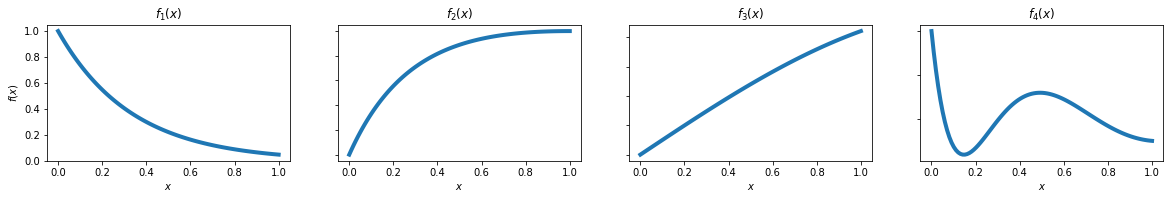

In [25]:
import numpy as np

from matplotlib import pyplot as plt
get_ipython().magic('matplotlib inline')

x_points = np.linspace(0,1,100)

fig, axs = plt.subplots(1, 4, figsize=(20,2.5))

axs[0].plot(x_points, True_functions[0][1](x_points), linewidth=4)
axs[0].set_title('$f_1(x)$')
axs[1].plot(x_points, True_functions[1][1](x_points), linewidth=4)
axs[1].set_title('$f_2(x)$')
axs[2].plot(x_points, True_functions[2][1](x_points), linewidth=4)
axs[2].set_title('$f_3(x)$')
axs[3].plot(x_points, True_functions[3][1](x_points), linewidth=4)
axs[3].set_title('$f_4(x)$')

for ax in axs.flat:
    ax.set(xlabel='$x$', ylabel='$f(x)$')

for ax in axs.flat:
    ax.label_outer()


As we can see, the Bessel function is the most complex. So will our symbolic metamodeling algorithm be able top recover the underlying mathematical expression describing these function and recognizing their varying levels of complexity?

## Running the experiments

Now we set up the experiment by first setting the number of evaluation points (npoints=100) that we will input to both the symbolic metamodeling and the symbolic regression models, and creating an empty list of learned symbolic expressions and $R^2$ scores.

In [26]:
npoints             = 100
xrange              = [0.01, 1]

symbolic_metamodels = []
symbolic_regssion   = []

sym_metamodel_R2    = []
sym_regression_R2   = []

Before running the experiments, we first import the **algorithms.symbolic_expressions** from **pysymbolic**. This module contains two functions **get_symbolic_model** and **symbolic_regressor**, which recovers univariate metamodels and symbolic regression models respectively. 

In [27]:
from mpmath import *
from sympy import *

from pysymbolic.algorithms.symbolic_expressions import *

Now we run the experiments by feeding in each function in **true_function** to both the functions **get_symbolic_model** and **symbolic_regressor**:

In [28]:
for true_function in True_functions:
    
    print('Now working on the ' + true_function[0])
    print('--------------------------------------------------------')
    print('--------------------------------------------------------')
    
    symbolic_model, _mod_R2 = get_symbolic_model(true_function[1], npoints, xrange)
    
    symbolic_metamodels.append(symbolic_model)
    sym_metamodel_R2.append(_mod_R2)
    
    symbolic_reg, _reg_R2   = symbolic_regressor(true_function[1], npoints, xrange)
    
    symbolic_regssion.append(symbolic_reg)
    sym_regression_R2.append(_reg_R2) 
    
    print('--------------------------------------------------------')


Now working on the Exponential function exp(-3x)
--------------------------------------------------------
--------------------------------------------------------
Expression: 1.0*x**1.0*exp(-1.0*x)
Loss: 0.12910507935488602
Expression: 1.0*x**1.00000001490116*exp(-1.0*x)
Loss: 0.129105080025377
Expression: 1.00000001490116*x**1.0*exp(-1.00000001490116*x)
Loss: 0.12910507918478836
Expression: 1.0*x**1.0*exp(-1.0*x)
Loss: 0.12910507935488602
Expression: 1.01089864124256*x**0.955004112794995*exp(-1.01141506060958*x)
Loss: 0.12685323461245696
Expression: 1.01089864124256*x**0.955004112794995*exp(-1.01141506060958*x)
Loss: 0.12685323461245696
Expression: 1.01089864141353*x**0.955004127696157*exp(-1.01141506060958*x)
Loss: 0.12685323533606144
Expression: 1.01089865546596*x**0.955004112794995*exp(-1.01141507551074*x)
Loss: 0.12685323439597915
Expression: 1.04395694692308*x**0.775020563974977*exp(-1.0570753030479*x)
Loss: 0.1157388005578358
Expression: 1.04395694692308*x**0.775020563974977*exp

## Results and discussion

Now let us check the symbolic expressions retrieved by both symbolic metamodeling and symbolic regression. In order to enable printing in LaTex format, we first invoke the "init_print" command of sympy as follows:

In [30]:
init_printing()

Now let us start with the first function $f_1(x) = e^{-3x}$, and see what the corresponding symbolic metamodel stroed in **symbolic_metamodels[0]**...

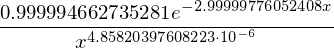

In [32]:
symbolic_metamodels[0].expression()

As we can see, this is almost exactly equal to $e^{-3x}$! This means that the metamodeling algorithm was able to recover the true expression for $f_1(x)$ based on 100 evaluation samples only. To check the corresponding values of the poles and zeros recovered by the gradient descent algorithm used to optimize the metamodel, we can inspect the attributes of the **MeijerG** object **symbolic_metamodels[0]** as follows:  

In [44]:
symbolic_metamodels[0].a_p, symbolic_metamodels[0].b_q, symbolic_metamodels[0]._const

([array([], dtype=float64), array([], dtype=float64)],
 [array([-4.85820398e-06]), array([], dtype=float64)],
 2.999997760524081)

Now let us check the expression learned by symbolic regression (whcih is stored in **symbolic_regssion[0]**)... 

In [35]:
symbolic_regssion[0]

Here, the symbolic regression algorithm retreived an approximation of $f_1(x) = e^{-3x}$, but failed to capture the exponential functional form of $f_1(x)$. This is because the symbolic regression search algorithm starts with predefined forms (mostly polynomials), and hence is less flexible than our Meijer $G$-function parameterization.

**What if we want to restrict our metamodels to polynomials only?** In this case, we can use the *approximate_expression* method to recover a Taylor approximation of the learned symbolic expression as follows.

In [36]:
from copy import deepcopy

polynomial_metamodel_of_f1 = deepcopy(symbolic_metamodels[0])

In [40]:
polynomial_metamodel_of_f1.approximation_order = 2

polynomial_metamodel_of_f1.approx_expression()

As we can see, the second order Taylor approximation of our metamodel appears to be very closed to the symbolic regression model!

But what about the other functions? Let us check $f_2(x) = \frac{x}{(x+1)^2}$ and see what the metamodel was for that.

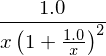

In [41]:
symbolic_metamodels[1].expression()

For $f_2(x)$, the metamodeling algorithm nailed it! It exactly recovered the true symbolic expression. For the symbolic regression model for $f_2(x)$, we have the following expression:

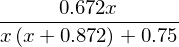

In [45]:
symbolic_regssion[1]

So the symbolic regression algorithm also did a good job in finding the true mathematical expression for $f_2(x)$, though it recovered a less accurate expression than that of the metamodel. Now let us examine the results third function $f_3(x) = \sin(x)$...

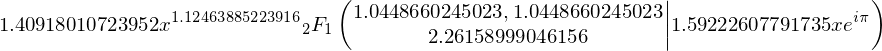

In [46]:
symbolic_metamodels[2].expression()

In [47]:
symbolic_regssion[2]

Here, both algorithms came up with approximations of the sinusoid function in the range $[0,1]$. This is because in the range $[0,1]$ we see no full cycles of sinusoid, and hence it is indistiguishable from, say, a linear approximation. The confluent hypergeometric function $_2 F_1$ in the metamodel is very close to 0, and hence the metamodel can be though of as a linear approximation for the sinusoidal function. 

Now we look at the most tricky of the four functions: $f_4(x) = J_0\left(10\sqrt{x}\right)$. This one is diffcult because it already displays a lot of fluctuations in the range $[0,1]$, and has an unusual functional form. So what symbolic expressions did the two algorithms learn for $f_4(x)$?

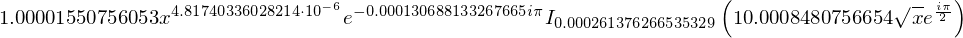

In [48]:
symbolic_metamodels[3].expression()

In [49]:
symbolic_regssion[3]

This is an exciting result! The symbolic metamodel is very close to the ground truth: it corresponded to a Bessel function of the second kind $I_0(x)$ instead of a Bessel function of the first kind $J_0(x)$! Using the identity $J_0(ix) = I_0(x)$, we can see that our metamodel is in fact identical to the ground truth! 

The above "qualitative" comparisons show that symbolic metamodeling can recover richer and more complex expressions compared to symbolic regression. The quantitative comparison can be done by simply comparing the $R^2$ scores for the two algorithms on the four functions:

In [50]:
sym_metamodel_R2 

In [51]:
sym_regression_R2

Finally, to evaluate the numeric value of any metamodel for a given $x$, we can use the **evaluate** method of the **MeijerG** object. In the cell below, we evaluate all metamodels in the range $[0,1]$ and plot them along the true functions to see how accurate they are.

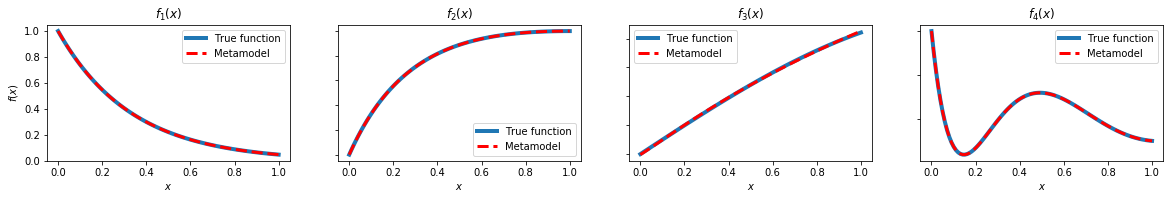

In [63]:
import numpy as np

from matplotlib import pyplot as plt
get_ipython().magic('matplotlib inline')

x_points = np.linspace(0,1,100)

fig, axs = plt.subplots(1, 4, figsize=(20,2.5))

axs[0].plot(x_points, True_functions[0][1](x_points), linewidth=4, label='True function')
axs[0].plot(x_points, symbolic_metamodels[0].evaluate(x_points), color='red', linewidth=3, linestyle='--', label='Metamodel')
axs[0].set_title('$f_1(x)$')
axs[0].legend()

axs[1].plot(x_points, True_functions[1][1](x_points), linewidth=4, label='True function')
axs[1].plot(x_points, symbolic_metamodels[1].evaluate(x_points), color='red', linewidth=3, linestyle='--', label='Metamodel')
axs[1].set_title('$f_2(x)$')
axs[1].legend()

axs[2].plot(x_points, True_functions[2][1](x_points), linewidth=4, label='True function')
axs[2].plot(x_points, symbolic_metamodels[2].evaluate(x_points), color='red', linewidth=3, linestyle='--', label='Metamodel')
axs[2].set_title('$f_3(x)$')
axs[2].legend()

axs[3].plot(x_points, True_functions[3][1](x_points), linewidth=4, label='True function')
axs[3].plot(x_points, symbolic_metamodels[3].evaluate(x_points), color='red', linewidth=3, linestyle='--', label='Metamodel')
axs[3].set_title('$f_4(x)$')
axs[3].legend()

for ax in axs.flat:
    ax.set(xlabel='$x$', ylabel='$f(x)$')

for ax in axs.flat:
    ax.label_outer()


## References

[1] Patryk Orzechowski, William La Cava, and Jason H Moore. Where are we now?: a large benchmark study of recent symbolic regression methods. *In Proceedings of the Genetic and Evolutionary Computation Conference*, pages 1183–1190. ACM, 2018.

[2] Telmo Menezes and Camille Roth. Symbolic regression of generative network models. *Scientific reports*, 4:6284, 2014.

[3] Ekaterina J Vladislavleva, Guido F Smits, and Dick Den Hertog. Order of nonlinearity as a com344 plexity measure for models generated by symbolic regression via pareto genetic programming. *IEEE Transactions on Evolutionary Computation*, 13(2):333–349, 2009.
